In [1]:
import pandas as pd

# Importar o arquivo Clientes
clientes = pd.read_excel('Clientes.xlsx')
df_clientes = pd.DataFrame(clientes)

df_clientes.head(5)


,ID Consumidor,Gênero,Estado civil,Pets,Bairro
0,3,F,Casado(a),1,Itaquera
1,8,F,Casado(a),2,Cidade tiradentes
2,9,F,Casado(a),5,Cidade tiradentes
3,20,F,Solteiro(a),2,Guaianases
4,24,F,Solteiro(a),1,Cidade tiradentes


In [2]:
# Importar o arquivo vendas2
vendas = pd.read_excel('vendas2.xlsx')
df_vendas = pd.DataFrame(vendas)

df_vendas.head(5)


,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0


In [3]:


df_vendas = pd.merge(df_vendas, df_clientes[['ID Consumidor', 'Gênero']], on='ID Consumidor', how='left')
df_vendas.head(5)

,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor,Gênero
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0,F
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0,M
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0,F
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0,M
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0,F


In [4]:

df_vendas = df_vendas.rename(columns={'Gênero_y': 'Gênero'})
df_vendas.head(5)

,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor,Gênero
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0,F
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0,M
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0,F
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0,M
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0,F


In [5]:


df_vendas = pd.merge(df_vendas, df_clientes[['ID Consumidor', 'Estado civil', 'Pets', 'Bairro']], on='ID Consumidor', how='left')

df_vendas.head(5)

,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor,Gênero,Estado civil,Pets,Bairro
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0,F,Casado(a),2,Itaquera
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0,M,Casado(a),5,Itaquera
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0,F,Casado(a),2,Guaianases
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0,M,Casado(a),3,Guaianases
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0,F,Solteiro(a),3,Cidade tiradentes


In [6]:


df_vendas['Faturamento Produto'] = df_vendas['Quantidade'] * df_vendas['Valor']
df_vendas.head(5)

,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor,Gênero,Estado civil,Pets,Bairro,Faturamento Produto
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0,F,Casado(a),2,Itaquera,400.0
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0,M,Casado(a),5,Itaquera,300.0
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0,F,Casado(a),2,Guaianases,21.0
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0,M,Casado(a),3,Guaianases,160.0
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0,F,Solteiro(a),3,Cidade tiradentes,96.0


In [7]:

faturamento_produto = df_vendas.groupby('Produto')['Faturamento Produto'].sum()


faturamento_total = df_vendas['Faturamento Produto'].sum()


print('Faturamento por produto:')
print(faturamento_produto)
print('\nFaturamento total: R$', faturamento_total)

Faturamento por produto:
Produto
Bolinha               21910.0
Coleira              197200.0
Guia                 441070.0
Osso                  74200.0
Petisco               24113.5
Ratinho               18830.0
Ração adulto 1kg     194202.0
Ração filhote 1kg    187551.0
Ração sênior 1kg     213851.0
Roupa de inverno     348720.0
Roupa de verão       245070.0
Varinha               61220.0
Name: Faturamento Produto, dtype: float64

Faturamento total: R$ 2027937.5


In [8]:

quantidade_total = df_vendas['Quantidade'].sum()


print('Quantidade total de produtos vendidos:', quantidade_total)

Quantidade total de produtos vendidos: 57369


In [9]:

media_pets = df_clientes['Pets'].mean()


print('Média de pets por clientes:', media_pets)

Média de pets por clientes: 2.611584011843079


In [10]:

faturamento_genero = df_vendas.groupby('Gênero')['Faturamento Produto'].sum()


faturamento_bairro = df_vendas.groupby('Bairro')['Faturamento Produto'].sum()


print('Faturamento total por gênero:')
print(faturamento_genero)
print('\nFaturamento total por bairro:')
print(faturamento_bairro)

Faturamento total por gênero:
Gênero
F    1110479.5
M     917458.0
Name: Faturamento Produto, dtype: float64

Faturamento total por bairro:
Bairro
Cidade tiradentes      389620.5
Guaianases             635391.0
Itaquera               663609.0
São Miguel Paulista    292759.5
Vila Prudente           46557.5
Name: Faturamento Produto, dtype: float64


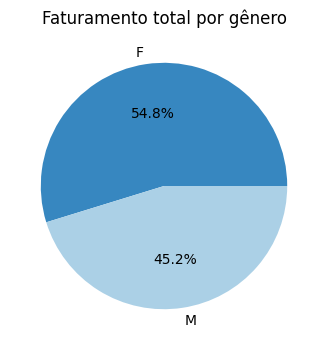

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


faturamento_genero = df_vendas.groupby('Gênero')['Faturamento Produto'].sum()


plt.figure(figsize=(4,4))
plt.title('Faturamento total por gênero')
cores = sns.color_palette('Blues_r', len(faturamento_genero))
plt.pie(faturamento_genero, labels=faturamento_genero.index, autopct='%1.1f%%', colors=cores)
plt.show()

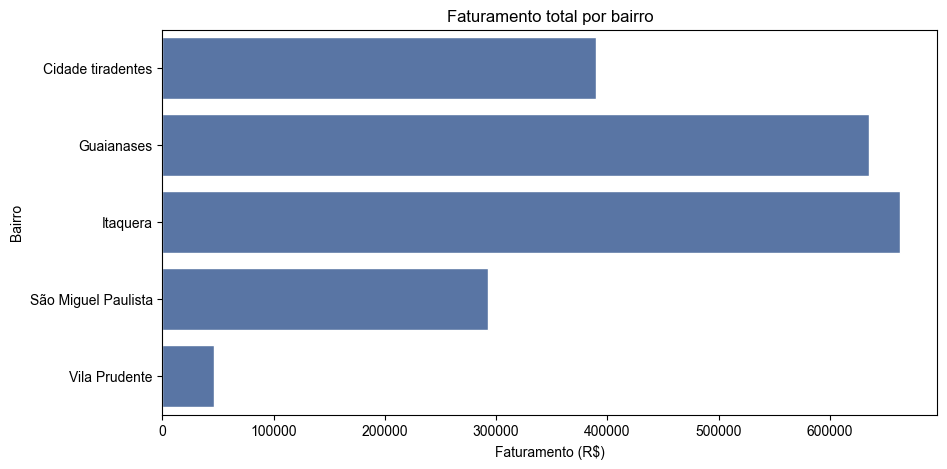

In [12]:

faturamento_bairro = df_vendas.groupby('Bairro')['Faturamento Produto'].sum()


plt.figure(figsize=(10,5))
plt.title('Faturamento total por bairro')
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
sns.barplot(x=faturamento_bairro.values, y=faturamento_bairro.index, color='b')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Bairro')
plt.show()

In [13]:

df_vendas['Data de compra'] = pd.to_datetime(df_vendas['Data de compra'])


df_vendas['Mês'] = df_vendas['Data de compra'].dt.month
df_vendas['Ano'] = df_vendas['Data de compra'].dt.year


faturamento_mes_ano = df_vendas.groupby(['Mês', 'Ano'])['Faturamento Produto'].sum().reset_index()


faturamento_mensal = faturamento_mes_ano.pivot(index='Mês', columns='Ano', values='Faturamento Produto')


print(faturamento_mensal)

Ano    2018     2019      2020
Mês                           
1       NaN  36905.5  112104.5
2       NaN  46863.5  118962.0
3       NaN  66494.0  121312.5
4       NaN  62250.0  112700.5
5       NaN  53233.5  121745.0
6       NaN  51756.5  117701.5
7       NaN  50208.0  125781.5
8       NaN  53635.5  115557.0
9       NaN  49755.5  122086.0
10      NaN  57772.5  120061.5
11      NaN  59980.5  119877.5
12   5382.5  80313.5   45497.0


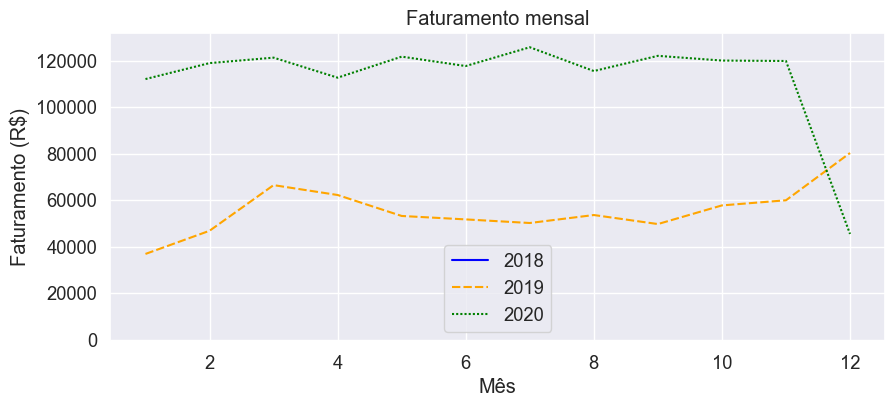

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,4))
plt.title('Faturamento mensal')
sns.lineplot(data=faturamento_mensal, palette=['blue', 'orange', 'green'])
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels)
plt.show()

In [15]:
df_vendas.head(5)

,Transacao,Data de compra,ID Consumidor,ID Produto,Quantidade,Produto,Categoria,Marca,Valor,Gênero,Estado civil,Pets,Bairro,Faturamento Produto,Mês,Ano
0,1,2018-12-18,7223,20,5,Guia,Acessório,Doguito,80.0,F,Casado(a),2,Itaquera,400.0,12,2018
1,2,2018-12-20,7841,7,5,Roupa de inverno,Roupa,Gatito,60.0,M,Casado(a),5,Itaquera,300.0,12,2018
2,3,2018-12-21,8374,15,3,Bolinha,Brinquedo,Doguito,7.0,F,Casado(a),2,Guaianases,21.0,12,2018
3,4,2018-12-21,9619,19,4,Coleira,Acessório,Doguito,40.0,M,Casado(a),3,Guaianases,160.0,12,2018
4,5,2018-12-22,1900,2,4,Ração adulto 1kg,Alimento,Gatito,24.0,F,Solteiro(a),3,Cidade tiradentes,96.0,12,2018


In [16]:
# Salvar o dataframe em um arquivo xlsx
df_vendas.to_excel('dados_vendas.xlsx', index=False)

In [17]:


produtos_mais_vendidos = df_vendas.groupby('Produto')['Faturamento Produto'].sum().reset_index()


produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Faturamento Produto', ascending=False)


print(produtos_mais_vendidos)

              Produto  Faturamento Produto
2                Guia             441070.0
9    Roupa de inverno             348720.0
10     Roupa de verão             245070.0
8    Ração sênior 1kg             213851.0
1             Coleira             197200.0
6    Ração adulto 1kg             194202.0
7   Ração filhote 1kg             187551.0
3                Osso              74200.0
11            Varinha              61220.0
4             Petisco              24113.5
0             Bolinha              21910.0
5             Ratinho              18830.0


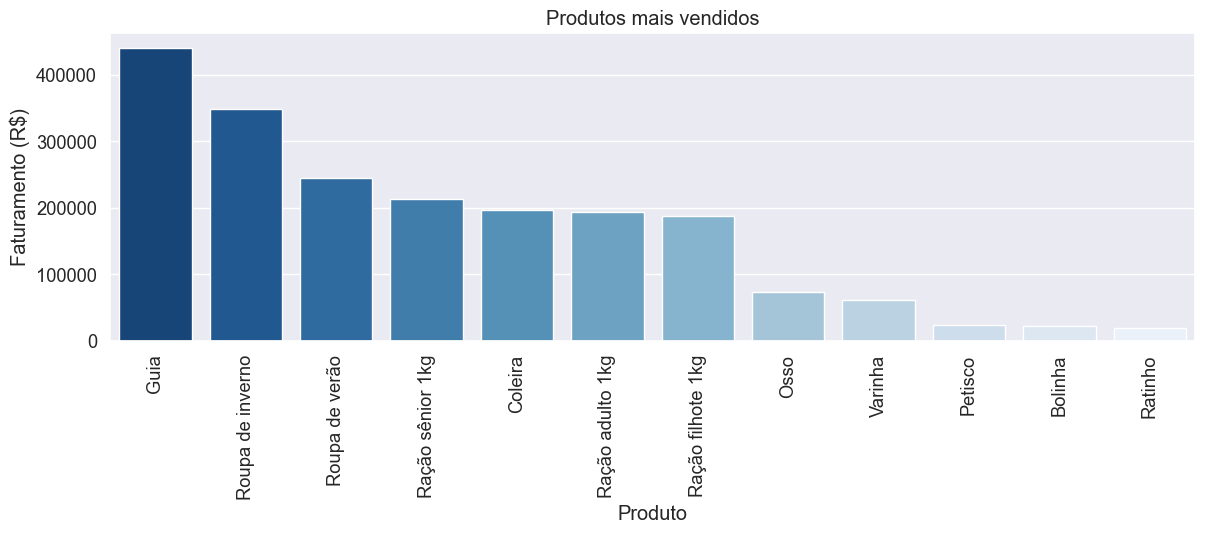

In [18]:

plt.figure(figsize=(14,4))
plt.title('Produtos mais vendidos')
sns.barplot(x='Produto', y='Faturamento Produto', data=produtos_mais_vendidos, palette='Blues_r')
plt.xlabel('Produto')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=90)

plt.show()

In [19]:
pip install --upgrade nbformat

In [21]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade pywaffle

Note: you may need to restart the kernel to use updated packages.


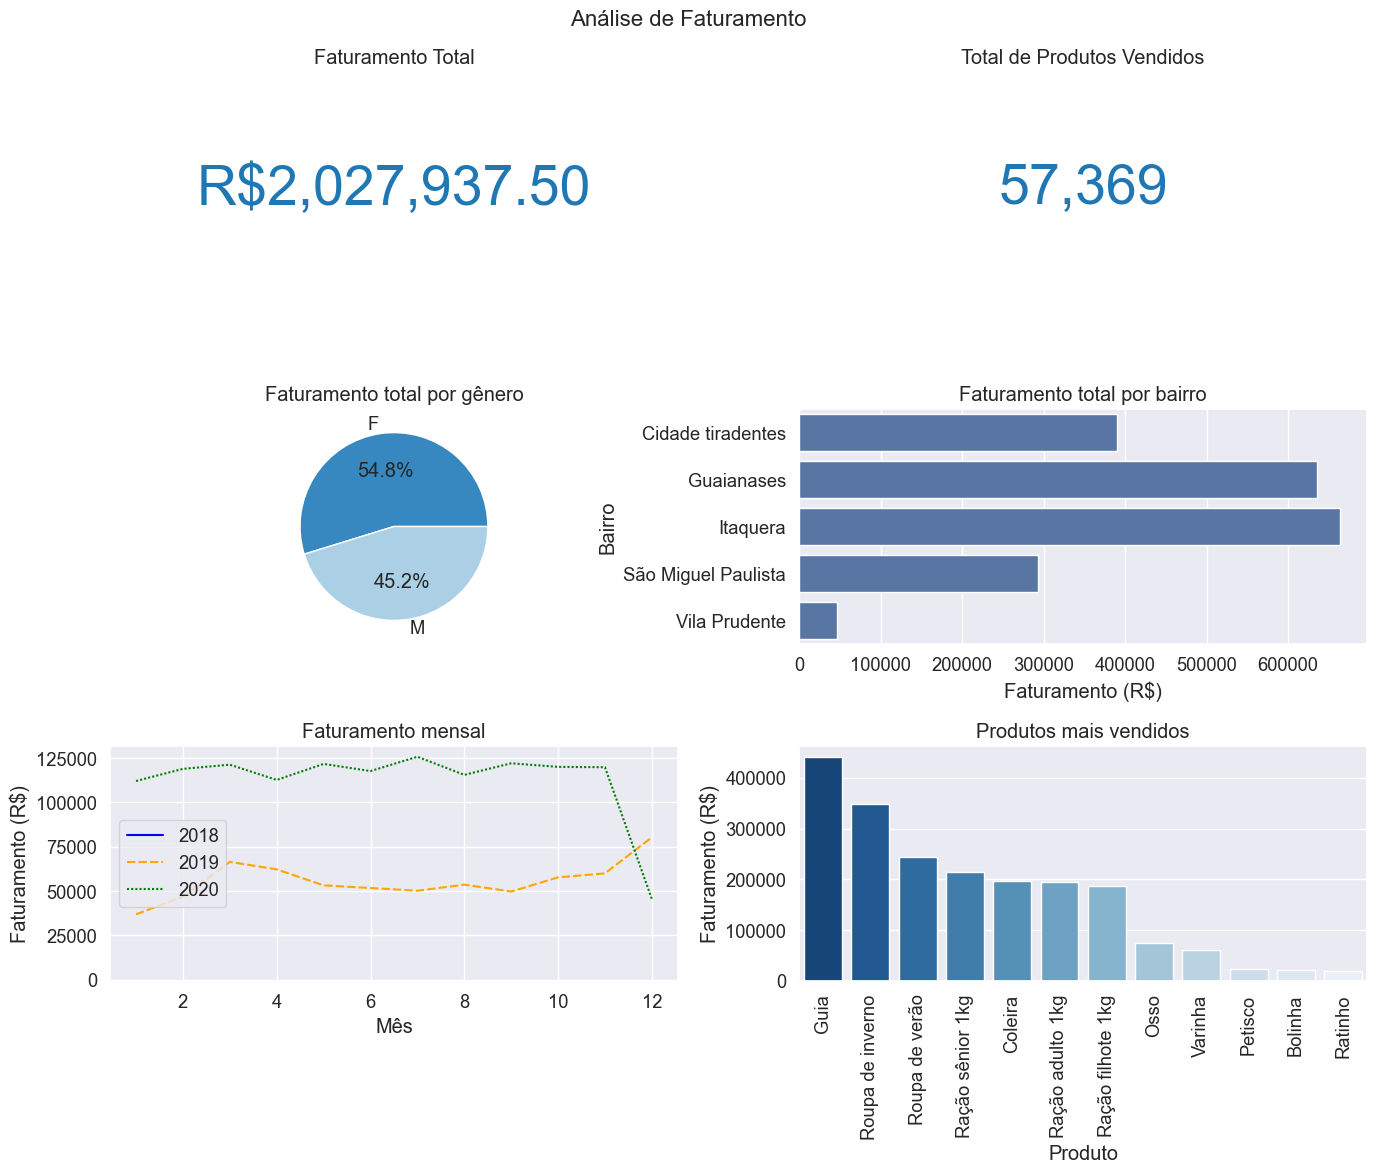

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Faturamento por gênero
faturamento_genero = df_vendas.groupby('Gênero')['Faturamento Produto'].sum()

# Faturamento por bairro
faturamento_bairro = df_vendas.groupby('Bairro')['Faturamento Produto'].sum()

# Faturamento mensal
plt.figure(figsize=(14, 12))
plt.suptitle('Análise de Faturamento', fontsize=16)

# Cartões visuais em texto
ax0 = plt.subplot(3, 2, 1)
ax0.text(0.5, 0.5, f'R${faturamento_total:,.2f}', ha='center', va='center', fontsize=40, color='#1f77b4')
ax0.set_title('Faturamento Total')
ax0.axis('off')

ax01 = plt.subplot(3, 2, 2)
ax01.text(0.5, 0.5, f'{total_produtos_vendidos:,}', ha='center', va='center', fontsize=40, color='#1f77b4')
ax01.set_title('Total de Produtos Vendidos')
ax01.axis('off')

# Subplot 1 - Faturamento por gênero
cores = sns.color_palette('Blues_r', len(faturamento_genero))
ax1 = plt.subplot(3, 2, 3)
ax1.pie(faturamento_genero, labels=faturamento_genero.index, autopct='%1.1f%%', colors=cores)
ax1.set_title('Faturamento total por gênero')

# Subplot 2 - Faturamento por bairro
sns.set_style('whitegrid')
sns.set(font_scale=1.2)
ax2 = plt.subplot(3, 2, 4)
sns.barplot(x=faturamento_bairro.values, y=faturamento_bairro.index, color='b', ax=ax2)
ax2.set_title('Faturamento total por bairro')
ax2.set_xlabel('Faturamento (R$)')
ax2.set_ylabel('Bairro')

# Subplot 3 - Faturamento mensal
ax3 = plt.subplot(3, 2, 5)
sns.lineplot(data=faturamento_mensal, palette=['blue', 'orange', 'green'], ax=ax3)
ax3.set_title('Faturamento mensal')
ax3.set_xlabel('Mês')
ax3.set_ylabel('Faturamento (R$)')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles, labels=labels)

# Subplot 4 - Produtos mais vendidos
ax4 = plt.subplot(3, 2, 6)
sns.barplot(x='Produto', y='Faturamento Produto', data=produtos_mais_vendidos, palette='Blues_r', ax=ax4)
ax4.set_title('Produtos mais vendidos')
ax4.set_xlabel('Produto')
ax4.set_ylabel('Faturamento (R$)')
ax4.tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()